In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


# Data Preprocessing

In [2]:
df=pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")


In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [13]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [15]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## Questions
1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents?
3. Per Capita accidents in states?
4. Among the top 100 cities in number of accidents, which state do they belong to most frequently?
5. What time of the day are accidents most frequent in?
6. Which days of the week has most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year(decreasing or increasing)
9. When the accidents per unit of traffic the highest.

In [16]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [18]:
df.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [20]:
missing_percentages=df.isnull().sum().sort_values(ascending=False)/len(df)

In [21]:
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [27]:
temp=missing_percentages[missing_percentages!=0]

<Axes: >

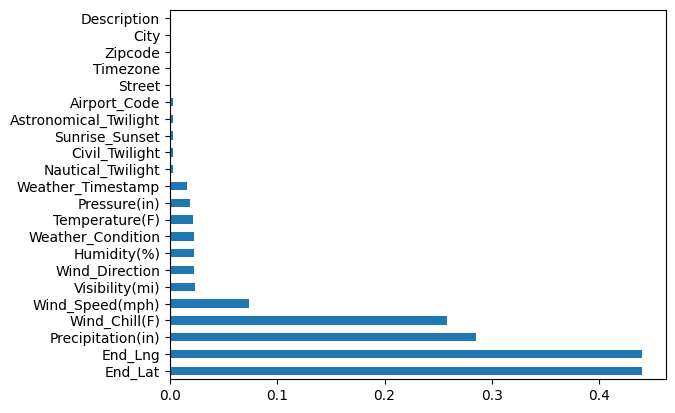

In [28]:
temp.plot(kind="barh")


# Exploratory Data Analysis
1. City
2. Start time 
3. Start lat, Start Long
4. Weather (Temperature, Humidity, Wind Speed, Visibility, Weather condition)
5. Accident severity
6. Accident Location


## Cities

In [36]:
Cities=df.City.value_counts()
Cities

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [34]:
uni_cities=df.City.unique()
len(uni_cities)

13679

In [38]:
Cities[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: ylabel='City'>

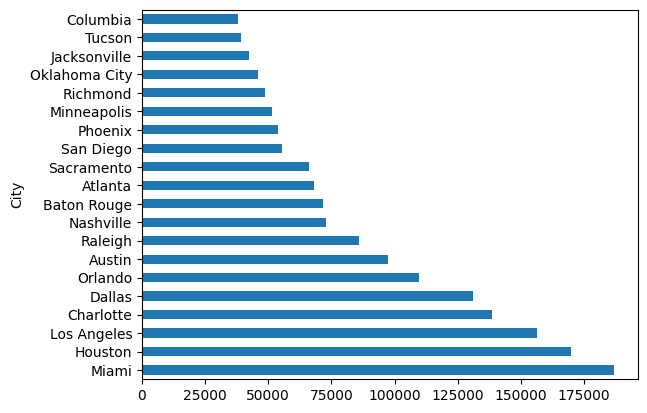

In [39]:
Cities[:20].plot(kind="barh")

In [24]:
import seaborn as sns

In [41]:
sns.set_style("darkgrid")

/tmp/ipykernel_33/2782060155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Cities)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

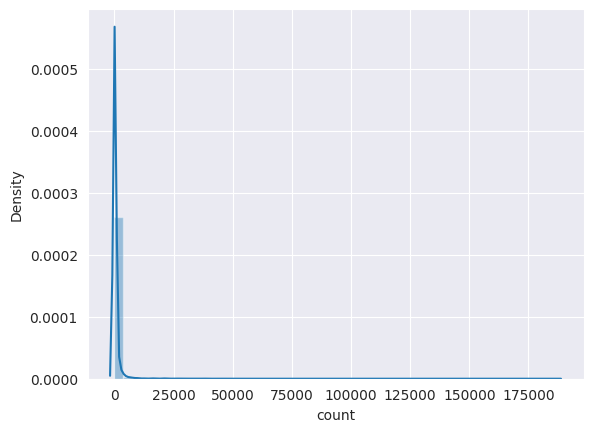

In [42]:
sns.distplot(Cities)

In [49]:
High_accident_cities=Cities[Cities>=1000]
Low_accident_cities=Cities[Cities<1000]

print(len(High_accident_cities))
print(len(Low_accident_cities))

1218
12460


In [52]:
len(High_accident_cities)/len(Cities)

0.08904810644831115

/tmp/ipykernel_33/3839640412.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(High_accident_cities)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

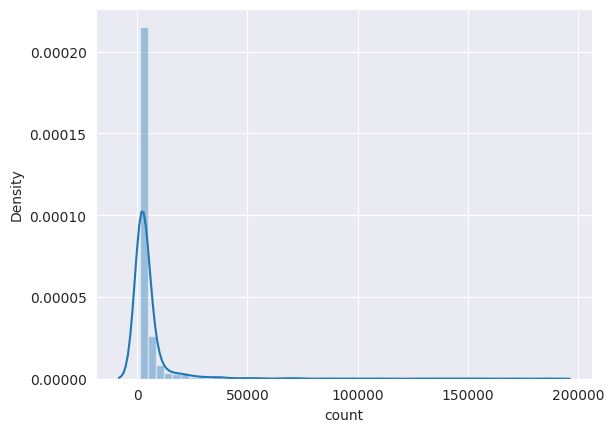

In [51]:
sns.distplot(High_accident_cities)

/tmp/ipykernel_33/3882275027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Low_accident_cities)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

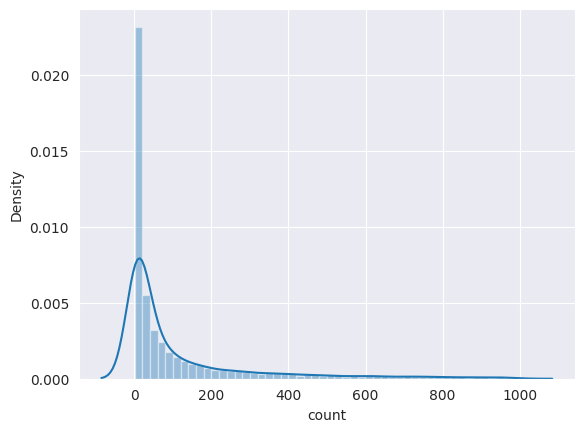

In [53]:
sns.distplot(Low_accident_cities)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

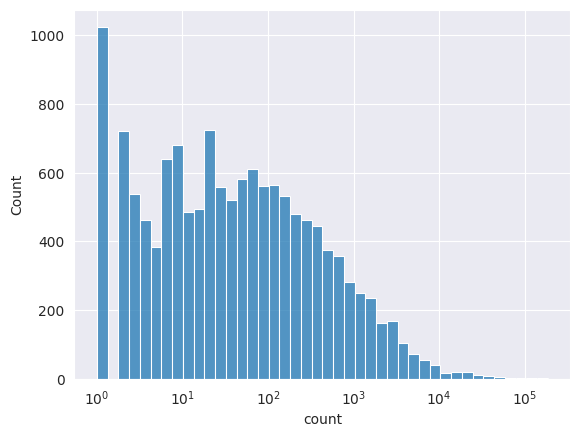

In [56]:
sns.histplot(Cities, log_scale=True)

In [58]:
Cities_with_only_1_accident=Cities[Cities==1]
Cities_with_only_1_accident

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

In [59]:
(len(Cities_with_only_1_accident)/len(Cities))*100

7.479163620412341

## Start Time

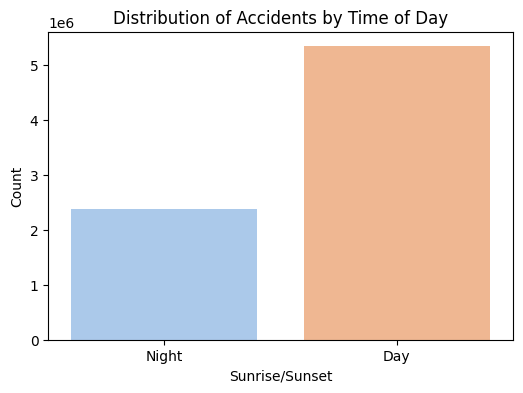

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sunrise_Sunset', data=df, palette='pastel')
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Sunrise/Sunset')
plt.ylabel('Count')
plt.show()

In [11]:
Start_Time=df["Start_Time"]
Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [6]:
Start_Time[:2]

0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
Name: Start_Time, dtype: object

In [7]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [8]:
df["Start_Time"][:2]

0   2016-02-08 05:46:00
1   2016-02-08 06:07:59
Name: Start_Time, dtype: datetime64[ns]

In [23]:
Time=Start_Time.dt.hour
# df["Start_Time"].dt.hour
Time

0           5.0
1           6.0
2           6.0
3           7.0
4           7.0
           ... 
7728389    18.0
7728390    19.0
7728391    19.0
7728392    19.0
7728393    18.0
Name: Start_Time, Length: 7728394, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

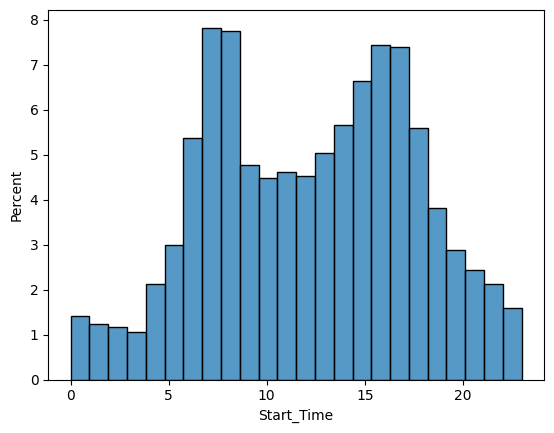

In [27]:
sns.histplot(Time,stat="percent",bins=24)

In [34]:
Day=Start_Time.dt.dayofweek
Day

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
7728389    4.0
7728390    4.0
7728391    4.0
7728392    4.0
7728393    4.0
Name: Start_Time, Length: 7728394, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

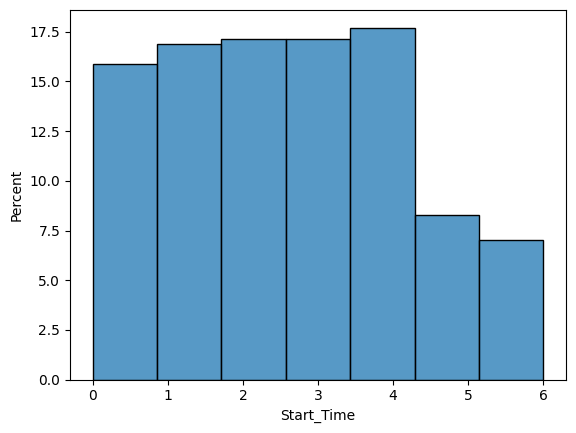

In [35]:
sns.histplot(Day,stat="percent",bins=7)

In [42]:
sundays=Start_Time[Day==6]
sunday_hour=sundays.dt.hour
sunday_hour

135        10
136        10
137        10
138        18
139        19
           ..
7726136    22
7726137    23
7726252    22
7726253    22
7726292    22
Name: Start_Time, Length: 490115, dtype: int32

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

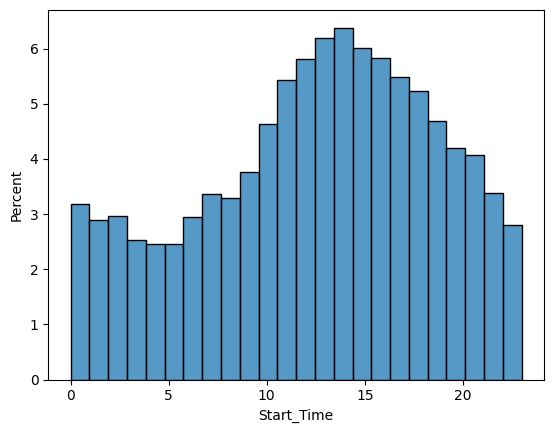

In [43]:
sns.histplot(sunday_hour,stat="percent",bins=24)

In [45]:
mondays=Start_Time[Day==0]
monday_hour=mondays.dt.hour
monday_hour

0           5
1           6
2           6
3           7
4           7
           ..
7726332    20
7726333    20
7726696    22
7726697    22
7726698    22
Name: Start_Time, Length: 1108807, dtype: int32

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

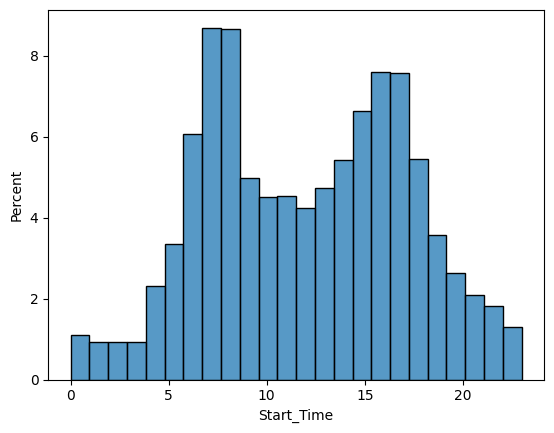

In [46]:
sns.histplot(monday_hour,stat="percent",bins=24)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

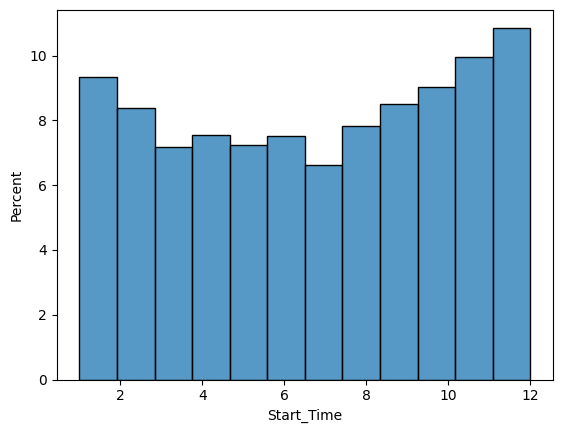

In [50]:
sns.histplot(Start_Time.dt.month,stat="percent",bins=12)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

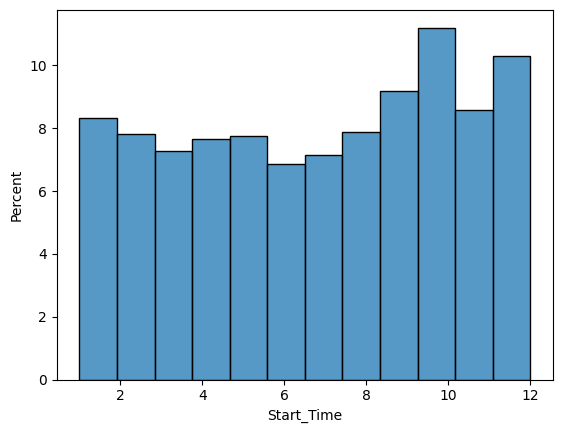

In [58]:
df_2019=df[Start_Time.dt.year==2019]
sns.histplot(df_2019.Start_Time.dt.month,stat="percent",bins=12)

## Start Latitude and Start Longitude

In [3]:
df["Start_Lat"]

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [4]:
df["Start_Lng"]

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [5]:
sample_df=df.sample(int(0.01*len(df)))

In [6]:
import folium

In [7]:
lat,lon=df.Start_Lat[0],df.Start_Lng[0]
map=folium.Map()
marker=folium.Marker((lat,lon))
marker.add_to(map)
map


In [21]:
import pandas as pd
for index, row in df[["Start_Lat", "Start_Lng"]].sample(100).iterrows():
    print(row["Start_Lat"], row["Start_Lng"])

25.739256 -80.239538
38.956387 -94.733025
33.059566 -80.232315
34.558285 -118.132339
47.24561 -93.486178
25.733053 -80.32338100000003
37.54103900000001 -77.478981
34.689732 -86.580162
34.063204 -117.386581
33.891228000000005 -84.26011700000002
39.386873 -76.758494
41.293994 -72.78264899999998
35.012665000000005 -85.252721
33.873731 -118.251953
40.170483 -75.14278399999998
40.99453 -76.477257
33.978249 -81.195084
41.73148 -87.62443
30.481837 -84.312951
34.016065000000005 -117.462092
26.33186 -80.13871
29.859619 -95.38456
37.695452 -122.08151200000002
33.234989 -79.947479
40.709285 -74.18513399999998
25.934778 -80.151993
41.75761 -72.70055
37.552774 -77.443878
34.106682 -117.846367
35.716728 -79.632143
43.541599 -116.155403
35.410803 -82.518799
38.489758 -121.514335
40.497185 -77.860272
33.40776 -111.846325
39.828552 -75.432106
25.749193 -80.315156
34.033147 -81.088059
27.193254 -82.12231899999998
38.602311 -121.436463
29.705546 -95.588002
28.967159 -81.563926
35.383358 -119.061193
39.74

In [29]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df["Start_Lat"]), list(sample_df["Start_Lng"])))


In [30]:
from folium.plugins import HeatMap
map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map        

## Weather Condition

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:

df["Temperature(F)"]=(df["Temperature(F)"]-32)/1.8
Temperature=df["Temperature(F)"]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Temperature (Celsius)')

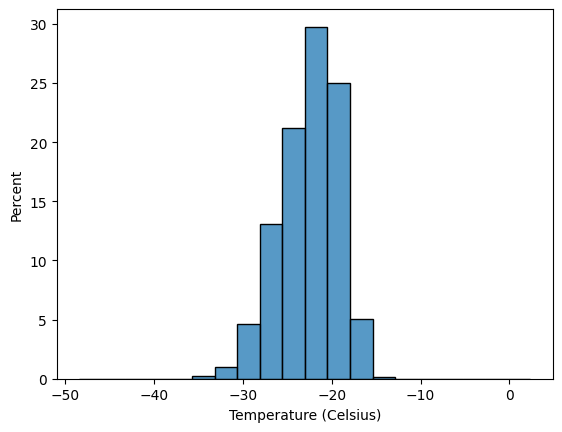

In [57]:
sns.histplot(Temperature, stat="percent", bins =20)
plt.xlabel("Temperature (Celsius)")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Humidity(%)', ylabel='Percent'>

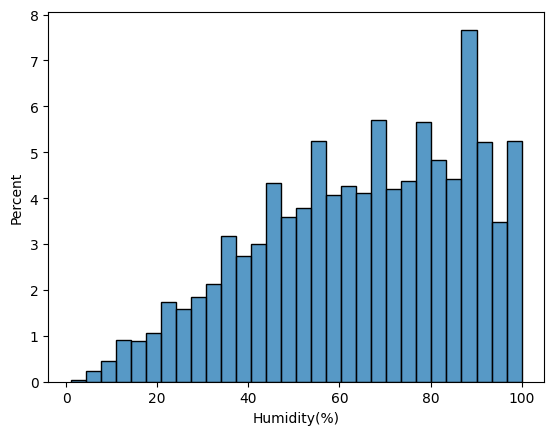

In [66]:
humid=df["Humidity(%)"]
sns.histplot(humid, stat="percent",bins=30)

In [78]:
weather=df["Weather_Condition"].value_counts()[:20]


<Axes: xlabel='Weather_Condition'>

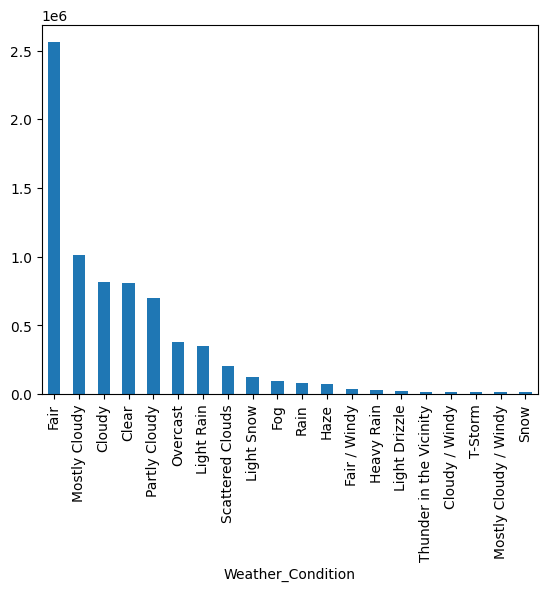

In [79]:
weather.plot(kind="bar")

## Accident Severity

In [40]:
Severity=df["Severity"].value_counts()

<Axes: xlabel='Severity'>

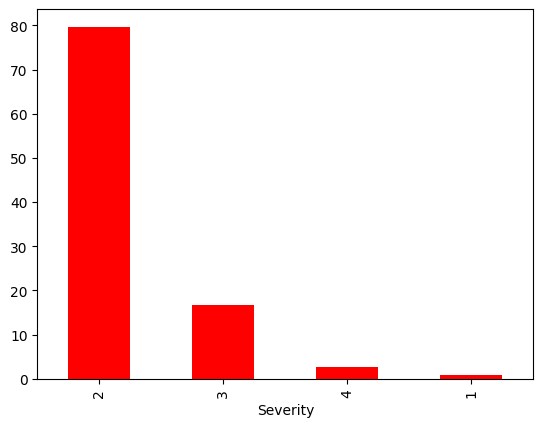

In [43]:
severity_percentages = df['Severity'].value_counts(normalize=True) * 100
severity_percentages.plot(kind='bar', color='red')

## Location of accident

In [8]:
df["Junction"].value_counts()


Junction
False    7157052
True      571342
Name: count, dtype: int64

In [9]:
df["Railway"].value_counts()

Railway
False    7661415
True       66979
Name: count, dtype: int64

In [10]:
df["Crossing"].value_counts()

Crossing
False    6854631
True      873763
Name: count, dtype: int64

In [11]:
df["Bump"].value_counts()

Bump
False    7724880
True        3514
Name: count, dtype: int64

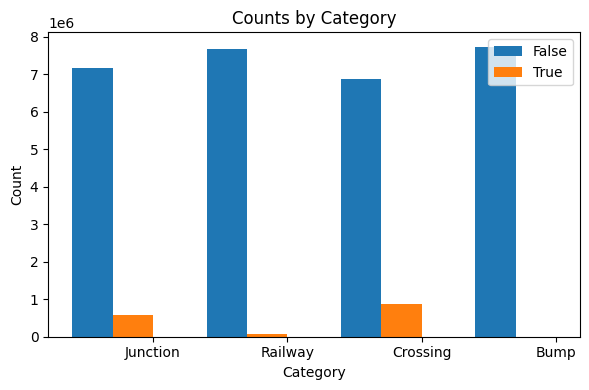

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame containing the data

# Combine counts for all categories into one DataFrame
counts = pd.concat([df["Junction"].value_counts(),
                    df["Railway"].value_counts(),
                    df["Crossing"].value_counts(),
                    df["Bump"].value_counts()],
                    axis=1)

# Rename columns for clarity
counts.columns = ['Junction', 'Railway', 'Crossing', 'Bump']

# Plotting
plt.figure(figsize=(6, 4))

# Define bar width
bar_width = 0.3

# Define the positions for each category
categories = np.arange(len(counts.columns))

# Iterate over each category and plot
for i, category in enumerate(counts.index):
    plt.bar(categories + (i - 1.5) * bar_width, counts.loc[category], 
            width=bar_width, label=category)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts by Category')
plt.xticks(categories, counts.columns)
plt.legend()
plt.tight_layout()
plt.show()


## Insights

1. No data for New York
2. Less than 9% of cities has 1000+ accidents.
3. Around 7% of cities has 1 accident.
4. The number of accident per city decreases exponentially.
5. Most accidents happen between 6am to 10 am probably because of the rush hours where everyone is in hurry to get to work and next time interval is 3pm and 6pm and the reason is same.
6. In Sundays the most accidents occur in the time frame of 10am to 3pm unlike other working days.
7. Accidents occur mostly in winters.
8. Accidents happen mostly in day time as compared to nught time as rush hours in in day itself.
9. The east and west coast of USA is where accidents happen the most as the concentration of cities like New york, New Jersey, Washington D.C., Log Angeles, San Fransico are present in these areas. The centre part of US is mostly arid or covered with Rocky Mountains so the population is sparse there.
10. Most of Accidents happened in temperature range of -30 to -10 degree celcius and humidity range of 70% to 90%.
11. Most accidents happen in fair weather as people typically go out during fair conditions.
12. Around 80% of accidents were of moderate severity.
13. Accidents occur mostly on plain roads rather than at junctions, crossings, bumps, or railways.